# GRIP TASK 1

# TASK - PREDICTION USING SUPERVISED ML

# AIM:
1) Predict the percentage of a student based on the no. of study hours.
2) What will be predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
NAME - UMA BHATTACHARYA

ALGORITHM USED - SIMPLE LINEAR REGRESSION

# STEP 1 : Importing all the required libraries

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression 

# STEP 2 : READING DATA FROM REMOTE LINK

In [4]:
url = "http://bit.ly/w-data"
task_data = pd.read_csv(url)
task_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
task_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# STEP 3 : PLOTTING THE DATA ON 2-D GRAPH

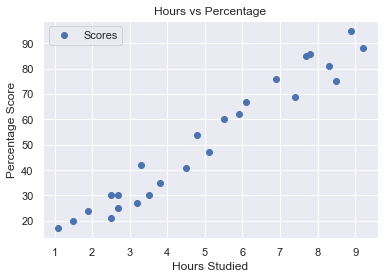

In [6]:
task_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

# STEP 4 : PREPARING THE DATA

In [11]:
X = task_data.iloc[:, :-1].values  
y = task_data.iloc[:, 1].values  

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# STEP 5 : TRAINING THE ALGORITHM

In [13]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# STEP 6 : PLOTTING THE REGRESSION LINE

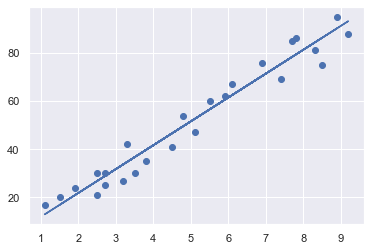

In [14]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# STEP 7 : MAKING PREDICTIONS

In [15]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**NOW WE COMPARE ACTUAL VS PREDICTED**

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# STEP 8 : PREDICTING SCORE OF A STUDENT WHO STUDIES 9.25 HOURS PER DAY

In [18]:
hours = 9.25
my_pred = regressor.predict(np.array([hours]).reshape(1,1))

In [19]:
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(my_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# STEP 9 : EVALUATING THE MODEL

**The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error.**

In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
